In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.ticker as ticker

gerekli manipülasyon ve grafikleştirmeler için kütüphanelerimi ekledim

In [145]:
# Veri setini notebook içerisine dahil edelim.

df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/global-jobs-and-salaries-2024/global_jobs_salaries_2024.csv")
df = df_.copy()

veri setimi yükleyip df olarak adlandırıyorum 

In [146]:
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.02,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.02)

projemin gereksinimi olarak her sütunda 0.02 yüzdelikte kayıp veri oluşturuyorum

## Veri setimi tanıma aşamalarım

Veri setim hakkında biraz bilgi vermek istiyorum.

Meslekler ve maaşlarını içeren 2024 yılı özelinde yapılmış bir çalışma. Şimdi sütunlarımdan bahsedelim.

1. Country : Maaş bilgisinin verildiği ülke.
2. Job Title : İlgili iş pozisyonu veya meslek adı.
3. Category : Pozisyonun ait olduğu genel sektör.
4. Salary : İlgili iş pozisyonunun maaşı, ülkenin yerel para biriminde.
5. Currency : Maaşın belirtilen yerel para birimi (örneğin, USD, EUR, TRY vb.).
6. Exchange Rate : Yerel para birimi ile ABD Doları (USD) arasındaki döviz kuru.
7. Salary (USD) : Yerel maaşın, belirtilen döviz kuru kullanılarak ABD Dolarına çevrilmiş hali.

In [147]:
df.head()

,Country,Job Title,Category,Salary,Currency,Exchange Rate,Salary (USD)
0,Afghanistan,Account Examiner,Accounting and Finance,501400.00,AFN,71.24,7037.74
1,Afghanistan,Account Executive,Accounting and Finance,890100.00,AFN,71.24,12493.61
2,Afghanistan,Accountant,Accounting and Finance,705500.00,AFN,71.24,9902.53
3,Afghanistan,Accounting Analyst,Accounting and Finance,810500.00,AFN,71.24,11376.33
4,Afghanistan,Accounting Assistant,Accounting and Finance,552400.00,AFN,71.24,7753.59


veri setimin ilk 5 satırını görüyorum

In [148]:
df.shape

(837125, 7)

veri setimin satır ve sütun sayısını görüntülüyorum. Veri setimde 837125 satır , 7 sutün bulunmaktadır.

In [149]:
df.columns

Index(['Country', 'Job Title', 'Category', 'Salary', 'Currency',
       'Exchange Rate', 'Salary (USD)'],
      dtype='object')

sütunlarımı öğreniyorum 

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837125 entries, 0 to 837124
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Country        820626 non-null  object 
 1   Job Title      820433 non-null  object 
 2   Category       820771 non-null  object 
 3   Salary         820303 non-null  float64
 4   Currency       820637 non-null  object 
 5   Exchange Rate  820631 non-null  float64
 6   Salary (USD)   820446 non-null  float64
dtypes: float64(3), object(4)
memory usage: 44.7+ MB


sütunlarım hakkında bilgi ediniyorum. Bu çıktı da kayıp verilerimin olduğunu açıkca görebiliyorum. 4 kategorik 3 de numeric değişkenim var.

In [151]:
df.dtypes

Country           object
Job Title         object
Category          object
Salary           float64
Currency          object
Exchange Rate    float64
Salary (USD)     float64
dtype: object

bu satırda da yine sütunlarımın tiplerini görebiliyorum.

## SÜTUNLARI SINIFLANDIRMA

Veri setimde kategorik ve numeric değişkenler bulunmakta daha sonraki aşamalarda kolaylık sağlaması açısından kategorik ve numeric değişkenleri sınıflandırma işlemi yapacağız

In [152]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

veri türü object veya categorical olan sütunları categorical_features'a , olmayanları ise numerical_features'a atadık.

In [153]:
categorical_features , numerical_features

(['Country', 'Job Title', 'Category', 'Currency'],
 ['Salary', 'Exchange Rate', 'Salary (USD)'])

Sınıflandırmamızı gerçekleştirdik "Country,Job Title, Category, Currency" değişkenlerinin kategorik. "Salary, Exchange Rate, Salary(USD)" değişkenlerinin nümerik olduğunu gösterdik.

## VERİ SETİMİZİN BETİMSEL İSTATİSTİKLERİNE BAKIYORUZ

In [154]:
pd.set_option('display.float_format','{:.2f}'.format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,820303.00,8458927.60,48721668.23,2020.00,39640.00,143200.00,1621400.00,2603999900.00
Exchange Rate,820631.00,1530.59,7485.57,0.31,1.00,10.80,177.94,90879.94
Salary (USD),820446.00,40901.65,264432.86,28.95,6259.02,14704.30,32591.86,16174763.85


Bu fonksiyon default olarak yalnızca numerik değişkenlere bakar. Burada veri setimizin betimsel istatistiklerine bakiyoruz ortalama,standart sapma,minimum,maksimum ve çeyreklikleri görebiliyoruz. describe kodumun sonuna " .T " komutu da ekleyerek çıktımı yan bir şekilde gösterdim(transpozunu aldım). Gördüğümüz bilgilerden çıkarım yapmak istersek ; maaşları USD cinsine çevirdiğimizde bu birimde en düşük maaşı alan kişinin maaşı 28.9500000 USD oluyor. En düşük döviz kuru 0.307772 olarak bulunmuştur

## EKSİK VERİLERİ İNCELEYELİM

In [155]:
df.isnull().sum()

Country          16499
Job Title        16692
Category         16354
Salary           16822
Currency         16488
Exchange Rate    16494
Salary (USD)     16679
dtype: int64

her bir sütunumda kaç adet eksik değer olduğunu görüyoruz.

In [156]:
df.isnull().sum().sum()

116028

bir önceki kod satırının sonuna tekrar".sum( )" eklediğimizde toplam kaç adet kayıp değerimiz olduğunu verir.

In [157]:
df.notnull().sum().sum()

5743847

veri setimdeki eksik olmayan veri sayısını gösteriyor. 5743847 adet verim bulunuyor.

In [158]:
df[df.notnull().all(axis = 1)][:5]

,Country,Job Title,Category,Salary,Currency,Exchange Rate,Salary (USD)
0,Afghanistan,Account Examiner,Accounting and Finance,501400.00,AFN,71.24,7037.74
1,Afghanistan,Account Executive,Accounting and Finance,890100.00,AFN,71.24,12493.61
2,Afghanistan,Accountant,Accounting and Finance,705500.00,AFN,71.24,9902.53
3,Afghanistan,Accounting Analyst,Accounting and Finance,810500.00,AFN,71.24,11376.33
4,Afghanistan,Accounting Assistant,Accounting and Finance,552400.00,AFN,71.24,7753.59


hiç eksik veri bulunmayan kayıtlarımdan ilk 5 örneğimi görüntülüyorum

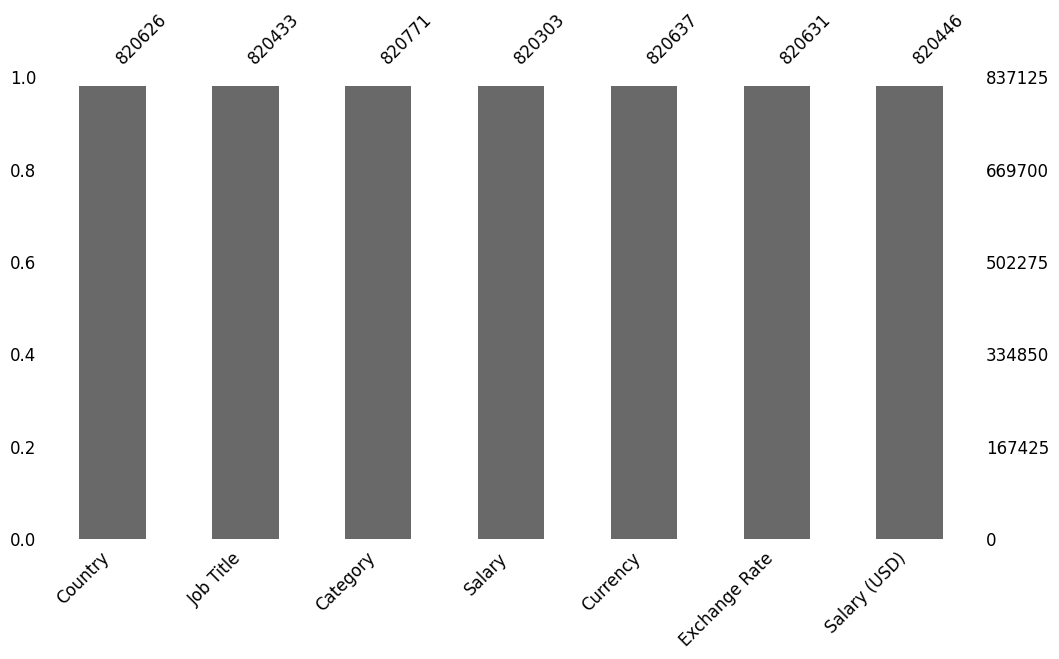

In [159]:
msno.bar(df=df,
        figsize=(12,6),
        fontsize=(12));

her bir sütundaki veri kaydımı grafik şeklinde gösterdim ancak birbirlerine yakın değerler içerdikleri için net bir görünüm elde edemedik.

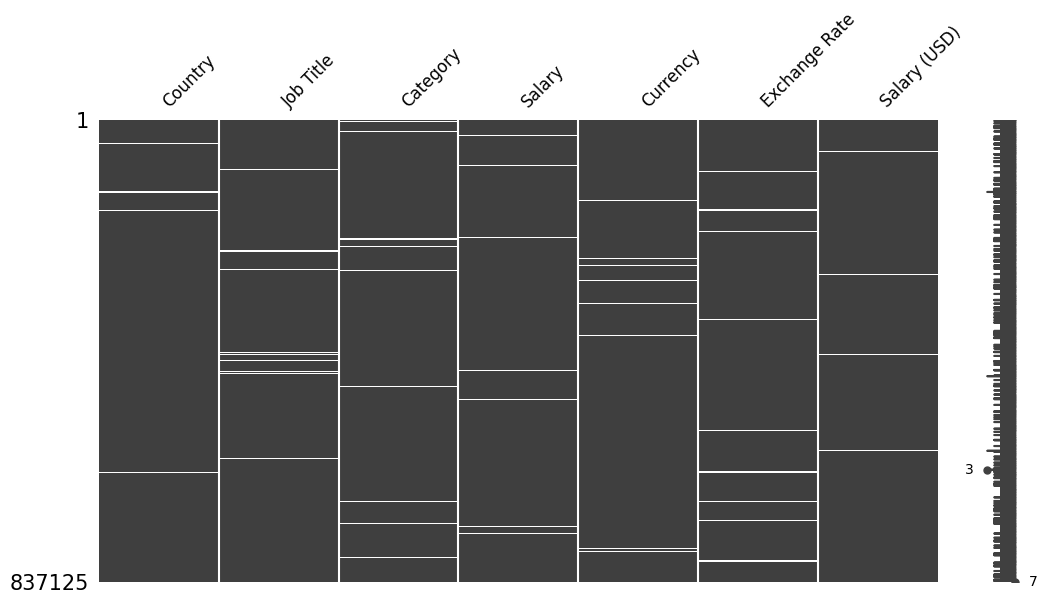

In [160]:
msno.matrix(df=df,
        figsize=(12,6),
        fontsize=(12));

değişkenlerimin içerisindeki kayıp verilerin birbirleriyle ilişkilerini gözlemlemek adına bu kod satırını ve grafiği kullandım ancak olabildiğince homojen dağıldığını görebiliyorum

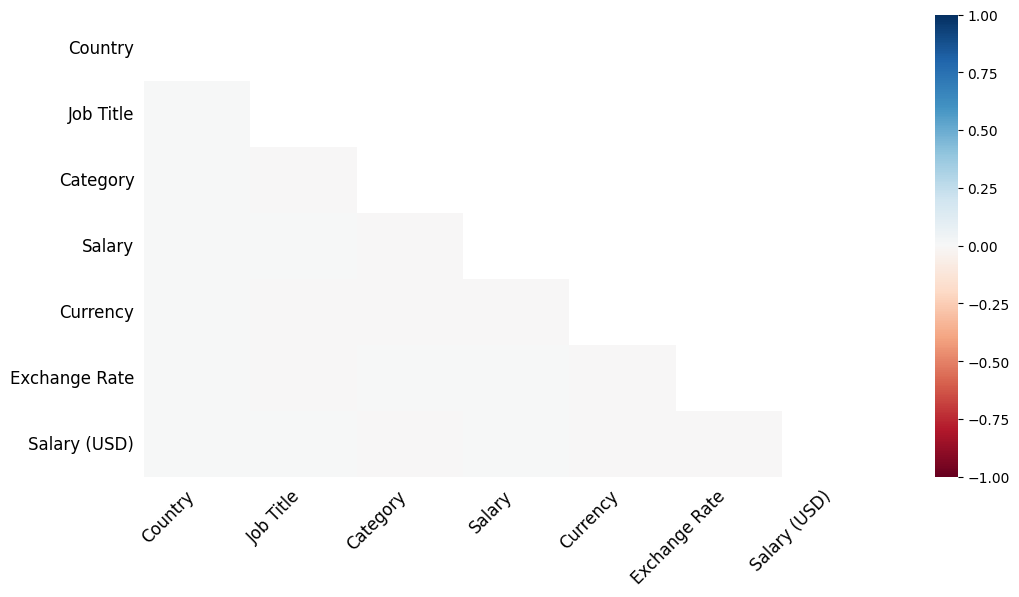

In [161]:
msno.heatmap(df=df,
            figsize=(12,6),
            fontsize=(12));

bu kod satırında korelasyon kullanarak eksik verilerimizin arasındaki ilişkiyi görüntüledik ancak bir ilişki olmadığını görebiiliyoruz.

## EKSİK VERİLERLE YAPACAĞIMIZ İŞLEMLER

Eksik verilerimin veri setimin %kaçını oluşturduğuyla ilgili bilgi edinip sonraki aşamalarda yapacağım işlemlere buna göre karar vereceğim

In [162]:
missing_percantage = (df.isnull().sum()/len(df)) * 100
missing_percantage

Country         1.97
Job Title       1.99
Category        1.95
Salary          2.01
Currency        1.97
Exchange Rate   1.97
Salary (USD)    1.99
dtype: float64

her bir değişkenim içindeki kayıp verilerimin o değişkenin % kaçını oluşturduğunu gösteriyorum.

In [163]:
total_missing_percantage= (df.isnull().sum().sum()/(df.size)) * 100
total_missing_percantage

1.9800422363958274

Eksik veriler mevcut tüm verimin % 1.9800422363958274 ' ünü oluşturuyor

*eksik verilerim veri setimin çok ufak bir parçasını oluşturduğunu gördüğüm için bu verileri silmemin elde edeceğim sonuçlarda çok büyük bir değişim yaratıcağını düşünmüyorum o yüzden eksik verileri silme işlemi uygulayacağım*

In [164]:
df_clear = df.dropna(inplace=False)
df_clear

,Country,Job Title,Category,Salary,Currency,Exchange Rate,Salary (USD)
0,Afghanistan,Account Examiner,Accounting and Finance,501400.00,AFN,71.24,7037.74
1,Afghanistan,Account Executive,Accounting and Finance,890100.00,AFN,71.24,12493.61
2,Afghanistan,Accountant,Accounting and Finance,705500.00,AFN,71.24,9902.53
3,Afghanistan,Accounting Analyst,Accounting and Finance,810500.00,AFN,71.24,11376.33
4,Afghanistan,Accounting Assistant,Accounting and Finance,552400.00,AFN,71.24,7753.59
...,...,...,...,...,...,...,...
837120,Zimbabwe,Telecommunications Facility Examiner,Telecommunication,1440700.00,ZWL,22105.28,65.17
837121,Zimbabwe,Telecommunications Line Installer,Telecommunication,1198300.00,ZWL,22105.28,54.21
837122,Zimbabwe,Telecommunications Manager,Telecommunication,4162800.00,ZWL,22105.28,188.32
837123,Zimbabwe,Telecommunications Network Engineer,Telecommunication,2508300.00,ZWL,22105.28,113.47


"dropna" kodunu kullanarak veri setimdeki kayıp verilerimi sildim ve yeni oluşan veri setini "df_clear" eşitliğine atadım. Artık veri setimde işlem yaparken çağıracağım güncel veri setim "df_clear" oldu.

In [165]:
df_clear.isnull().sum()

Country          0
Job Title        0
Category         0
Salary           0
Currency         0
Exchange Rate    0
Salary (USD)     0
dtype: int64

kayıp verileri sildiğim veri setini kontrol için tekrar bir işleme sokuyorum ve çıktı da gördüğümüz gibi hiçbir sütunumda kayıp veri kalmadı.

In [166]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727748 entries, 0 to 837124
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Country        727748 non-null  object 
 1   Job Title      727748 non-null  object 
 2   Category       727748 non-null  object 
 3   Salary         727748 non-null  float64
 4   Currency       727748 non-null  object 
 5   Exchange Rate  727748 non-null  float64
 6   Salary (USD)   727748 non-null  float64
dtypes: float64(3), object(4)
memory usage: 44.4+ MB


veri setimde sütunlardaki yeni veri sayılarını görüyoruz her bir sütunda  727748 veri bulunuyor ve artık kayıp verimiz yok. Orjinal indexler silinmedi ancak yeni veri setimizle işlemler yaptığımızda kayıp veri olan satırları sildiği için o satırları işleme almadan atlayarak devam ediyor.

## KATEGORİK DEĞİŞKEN ANALİZLERİM

In [167]:
df_clear_categorical = df_clear.select_dtypes(include="object")
df_clear_categorical

,Country,Job Title,Category,Currency
0,Afghanistan,Account Examiner,Accounting and Finance,AFN
1,Afghanistan,Account Executive,Accounting and Finance,AFN
2,Afghanistan,Accountant,Accounting and Finance,AFN
3,Afghanistan,Accounting Analyst,Accounting and Finance,AFN
4,Afghanistan,Accounting Assistant,Accounting and Finance,AFN
...,...,...,...,...
837120,Zimbabwe,Telecommunications Facility Examiner,Telecommunication,ZWL
837121,Zimbabwe,Telecommunications Line Installer,Telecommunication,ZWL
837122,Zimbabwe,Telecommunications Manager,Telecommunication,ZWL
837123,Zimbabwe,Telecommunications Network Engineer,Telecommunication,ZWL


kategorik olan tüm değişkenlerimi df_clear_categorical olarak adlandırıp görüntülüyorum

In [168]:
for col in df_clear_categorical.columns:
    print(f'{col} değişkeninde "{df_clear_categorical[col].nunique()}"farklı başlığa sahip değişken vardır \n')

Country değişkeninde "221"farklı başlığa sahip değişken vardır 

Job Title değişkeninde "3628"farklı başlığa sahip değişken vardır 

Category değişkeninde "50"farklı başlığa sahip değişken vardır 

Currency değişkeninde "150"farklı başlığa sahip değişken vardır 



bu kod satırında kategorik değişkenlerimin altında kaç adet farklı başlık olduğunu gösteriyoruz.

şimdi yapacağım işlemde ise her bir değişkenimin sahip olduğu benzersiz kategorilerden veri setimde kaçar adet olduğunu görüntüleyeceğim

In [169]:
for col in df_clear_categorical.columns:
    print(f'{df_clear_categorical[col].value_counts()}\n' , 5*"********************")

Country
Puerto Rico           3354
Samoa                 3346
Faroe Islands         3337
Dominican Republic    3337
Singapore             3331
                      ... 
French Guiana         3254
Slovenia              3253
India                 3249
Sudan                 3245
Sweden                3207
Name: count, Length: 221, dtype: int64
 ****************************************************************************************************
Job Title
Project Manager                 946
Operations Manager              792
Technical Manager               759
Contracts Manager               759
Service Engineer                590
                               ... 
Criminal Investigator           176
Automotive Assembly Operator    175
Grant Writer                    175
Dietary Aide                    175
Front Office Executive          175
Name: count, Length: 3628, dtype: int64
 ****************************************************************************************************
Catego

veri setim oldukça büyük olduğu için bütün kategorilerimi görüntüleyemedim ancak değişkenlerin sahip olduğu kategorilerdeki her bir benzersiz değerden kaç adet olduğunu görüntülüyoruz

## KATEGORİK DEĞİŞKENLERDE GÖRSELLEŞTİRMELER

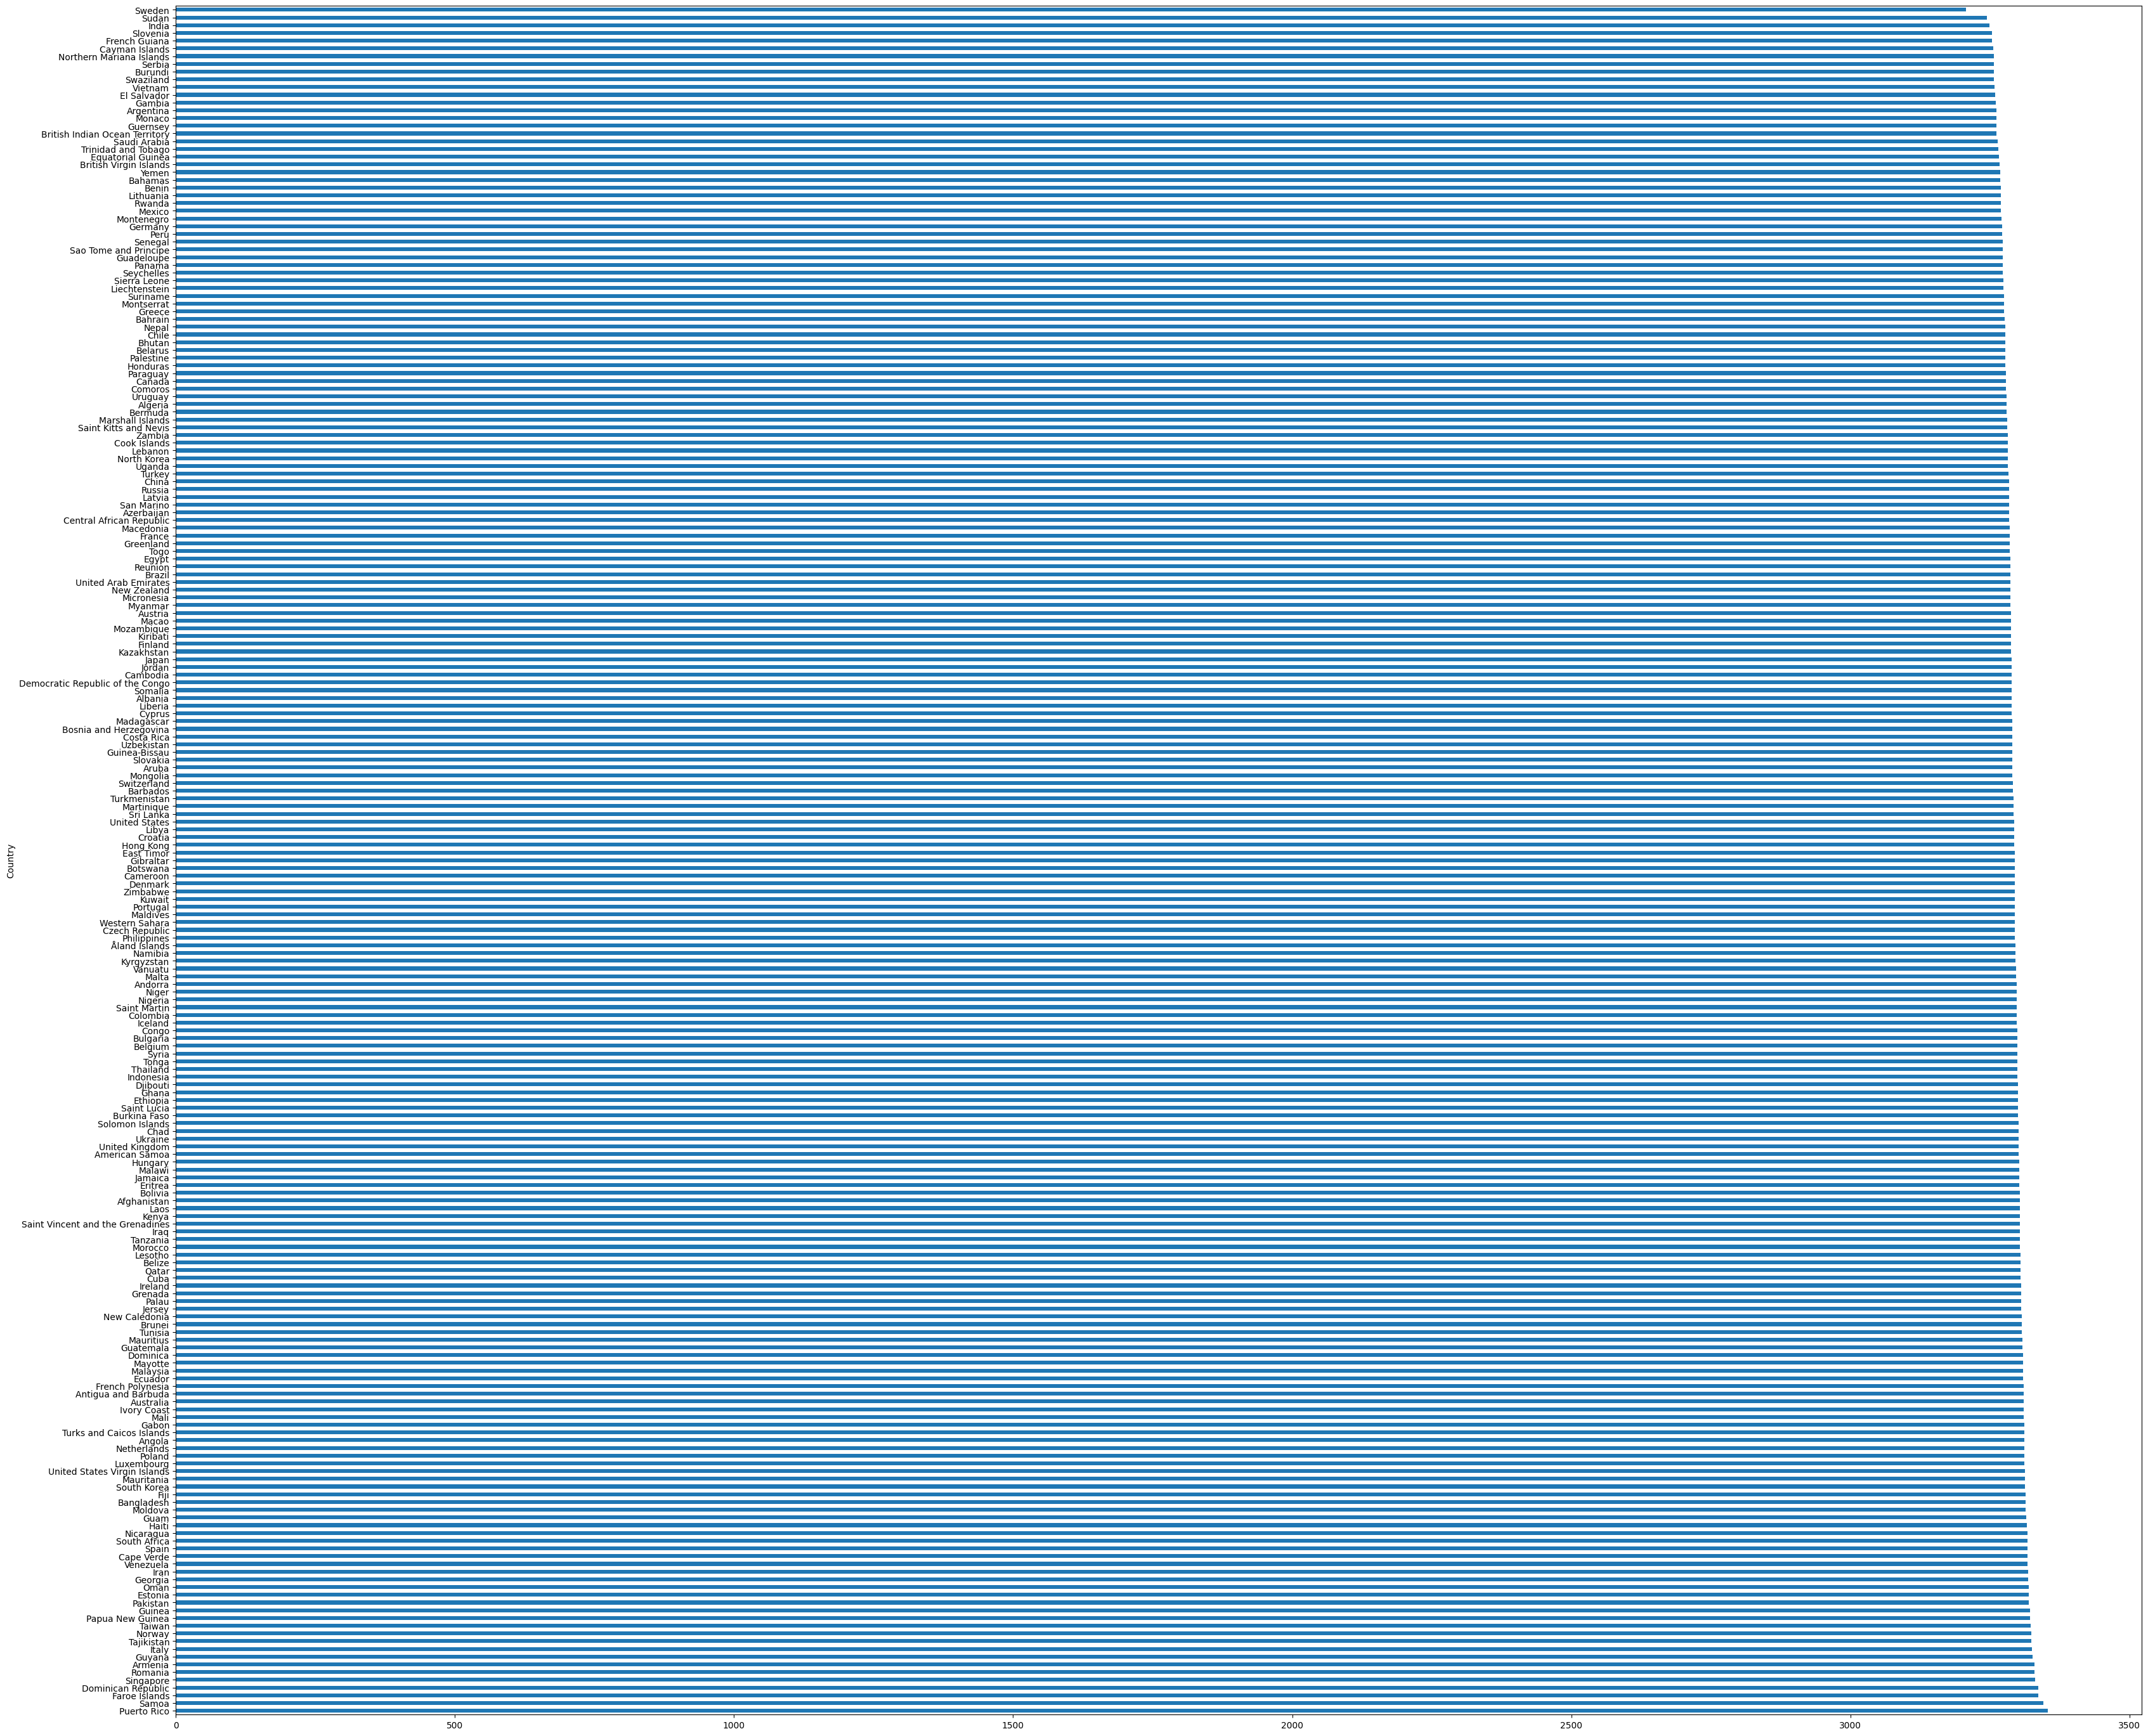

In [170]:
df_clear['Country'].value_counts().plot.barh(figsize=(40,35));

country değişkenimde 221 farklı ülke olduğu için grafiğim bu şekilde karmaşık çıkıyor ancak yine de ülke dağılımlarının birbirinde çok da farklı olmadığını göstermek amacıyla bu grafik yeterli.

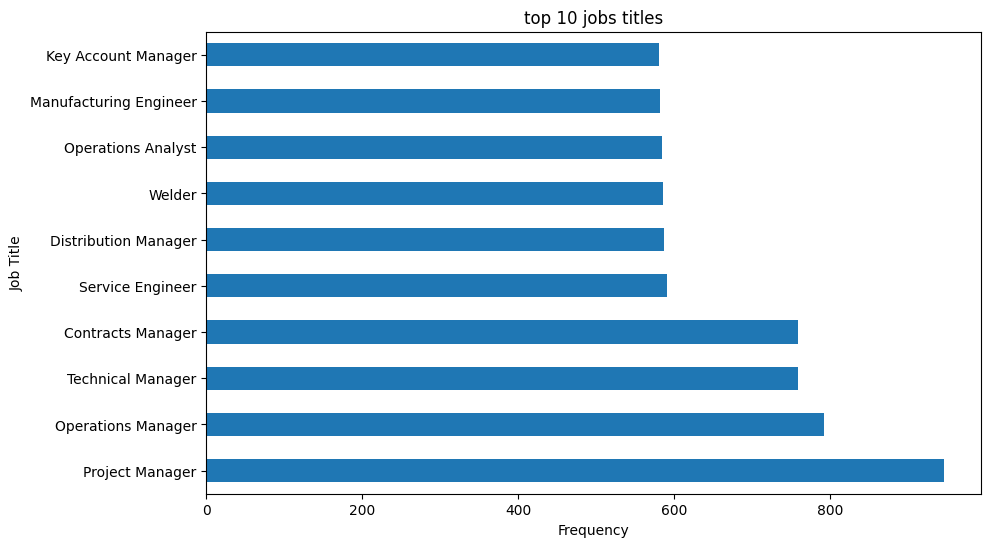

In [171]:
top_10_jobs = df_clear['Job Title'].value_counts().nlargest(10)

top_10_jobs.plot.barh(figsize=(10, 6))

plt.title('top 10 jobs titles')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()


veri setimde 3628 adet farklı iş unvanı olduğu için hepsini gösterdiğimde ortata cok karışık bir grafik cıktı ancak en popüler 10 tanesini burada gösterebiliyorum

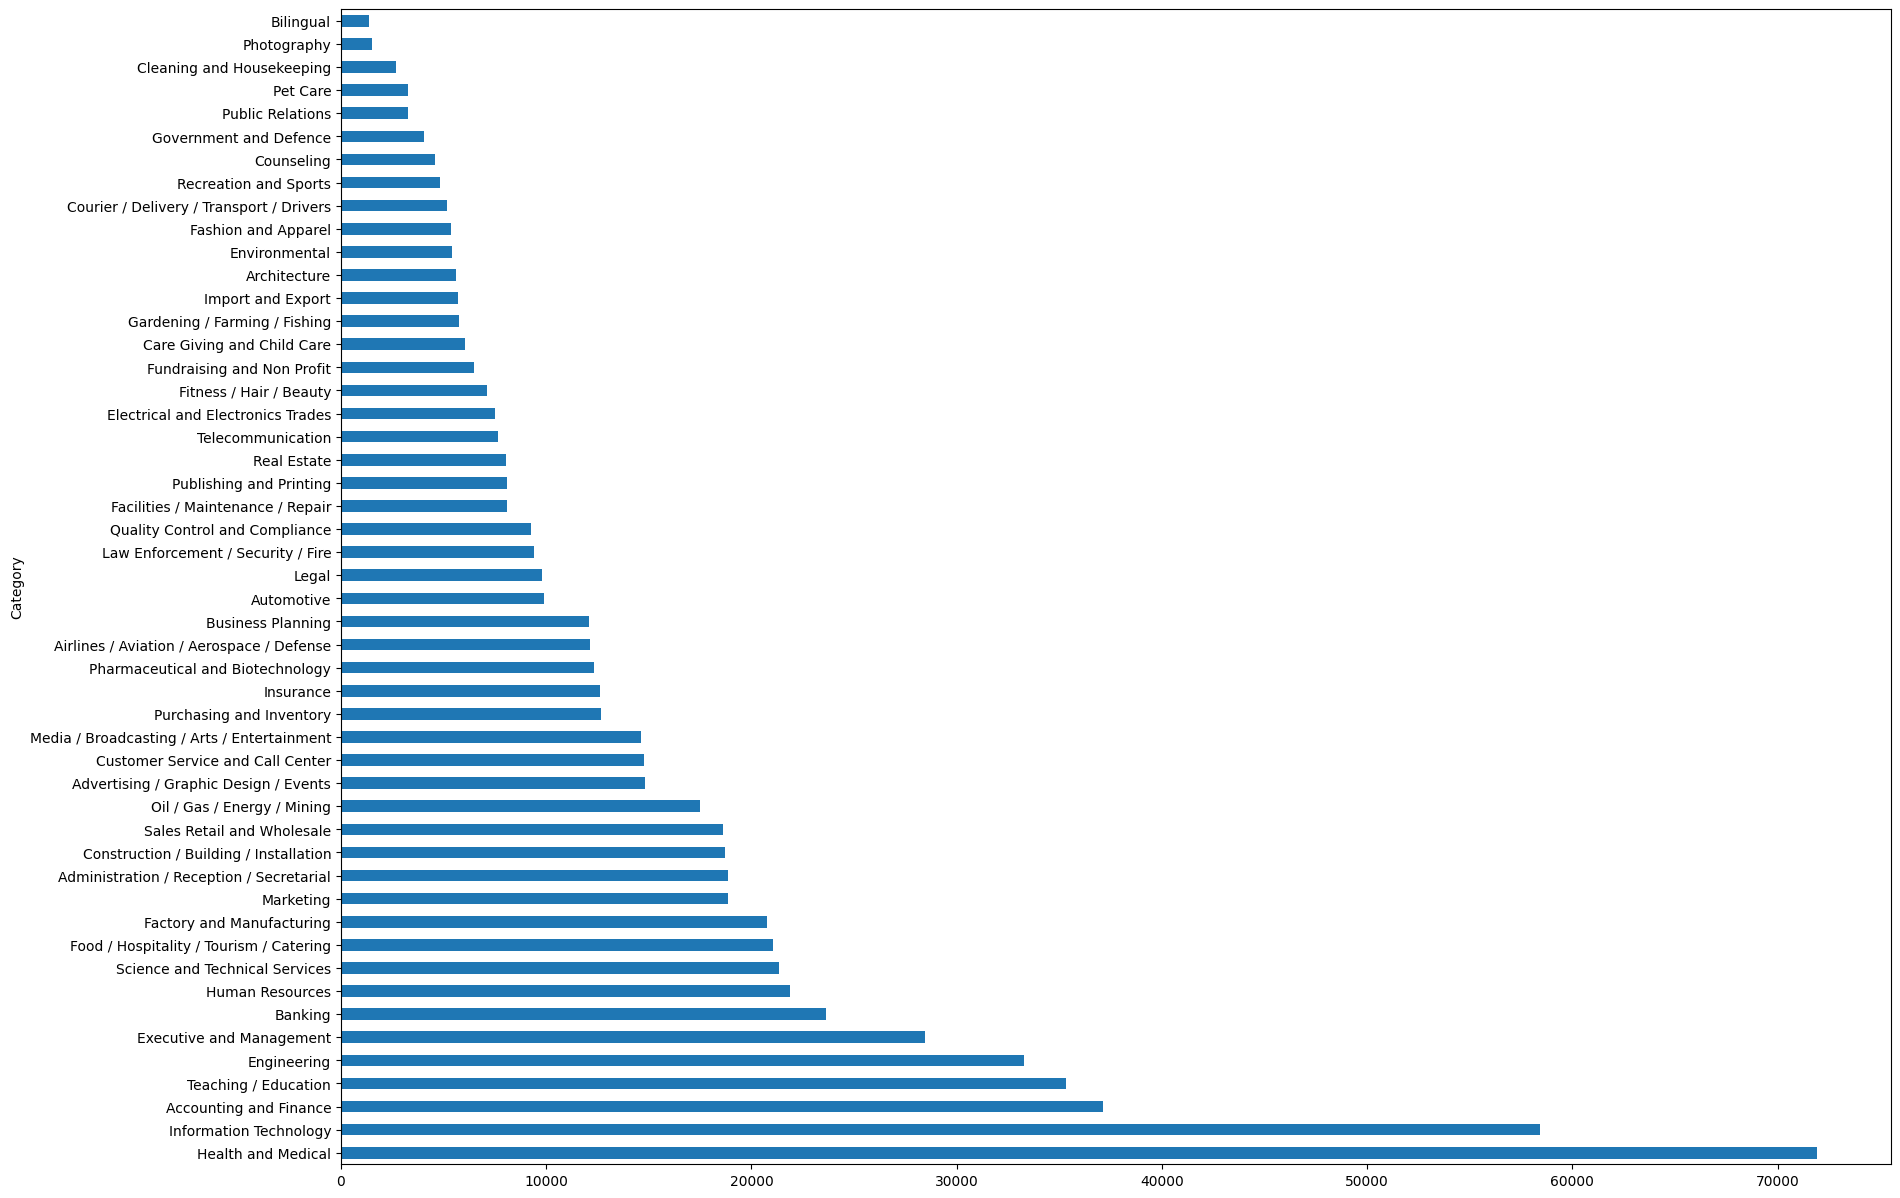

In [172]:
df_clear['Category'].value_counts().plot.barh(figsize=(20,15));

işlerin ait oldukları kategorileri grafikleştiriimde ise health and medical alanındaki çalışan sayısının 70000 den fazla olduğunu görebiliyorum hemen arkasından information technology geliyor bu alanda da 50000 den fazla çalışan kişi mevcut. 50 farklı kategori mevcut.

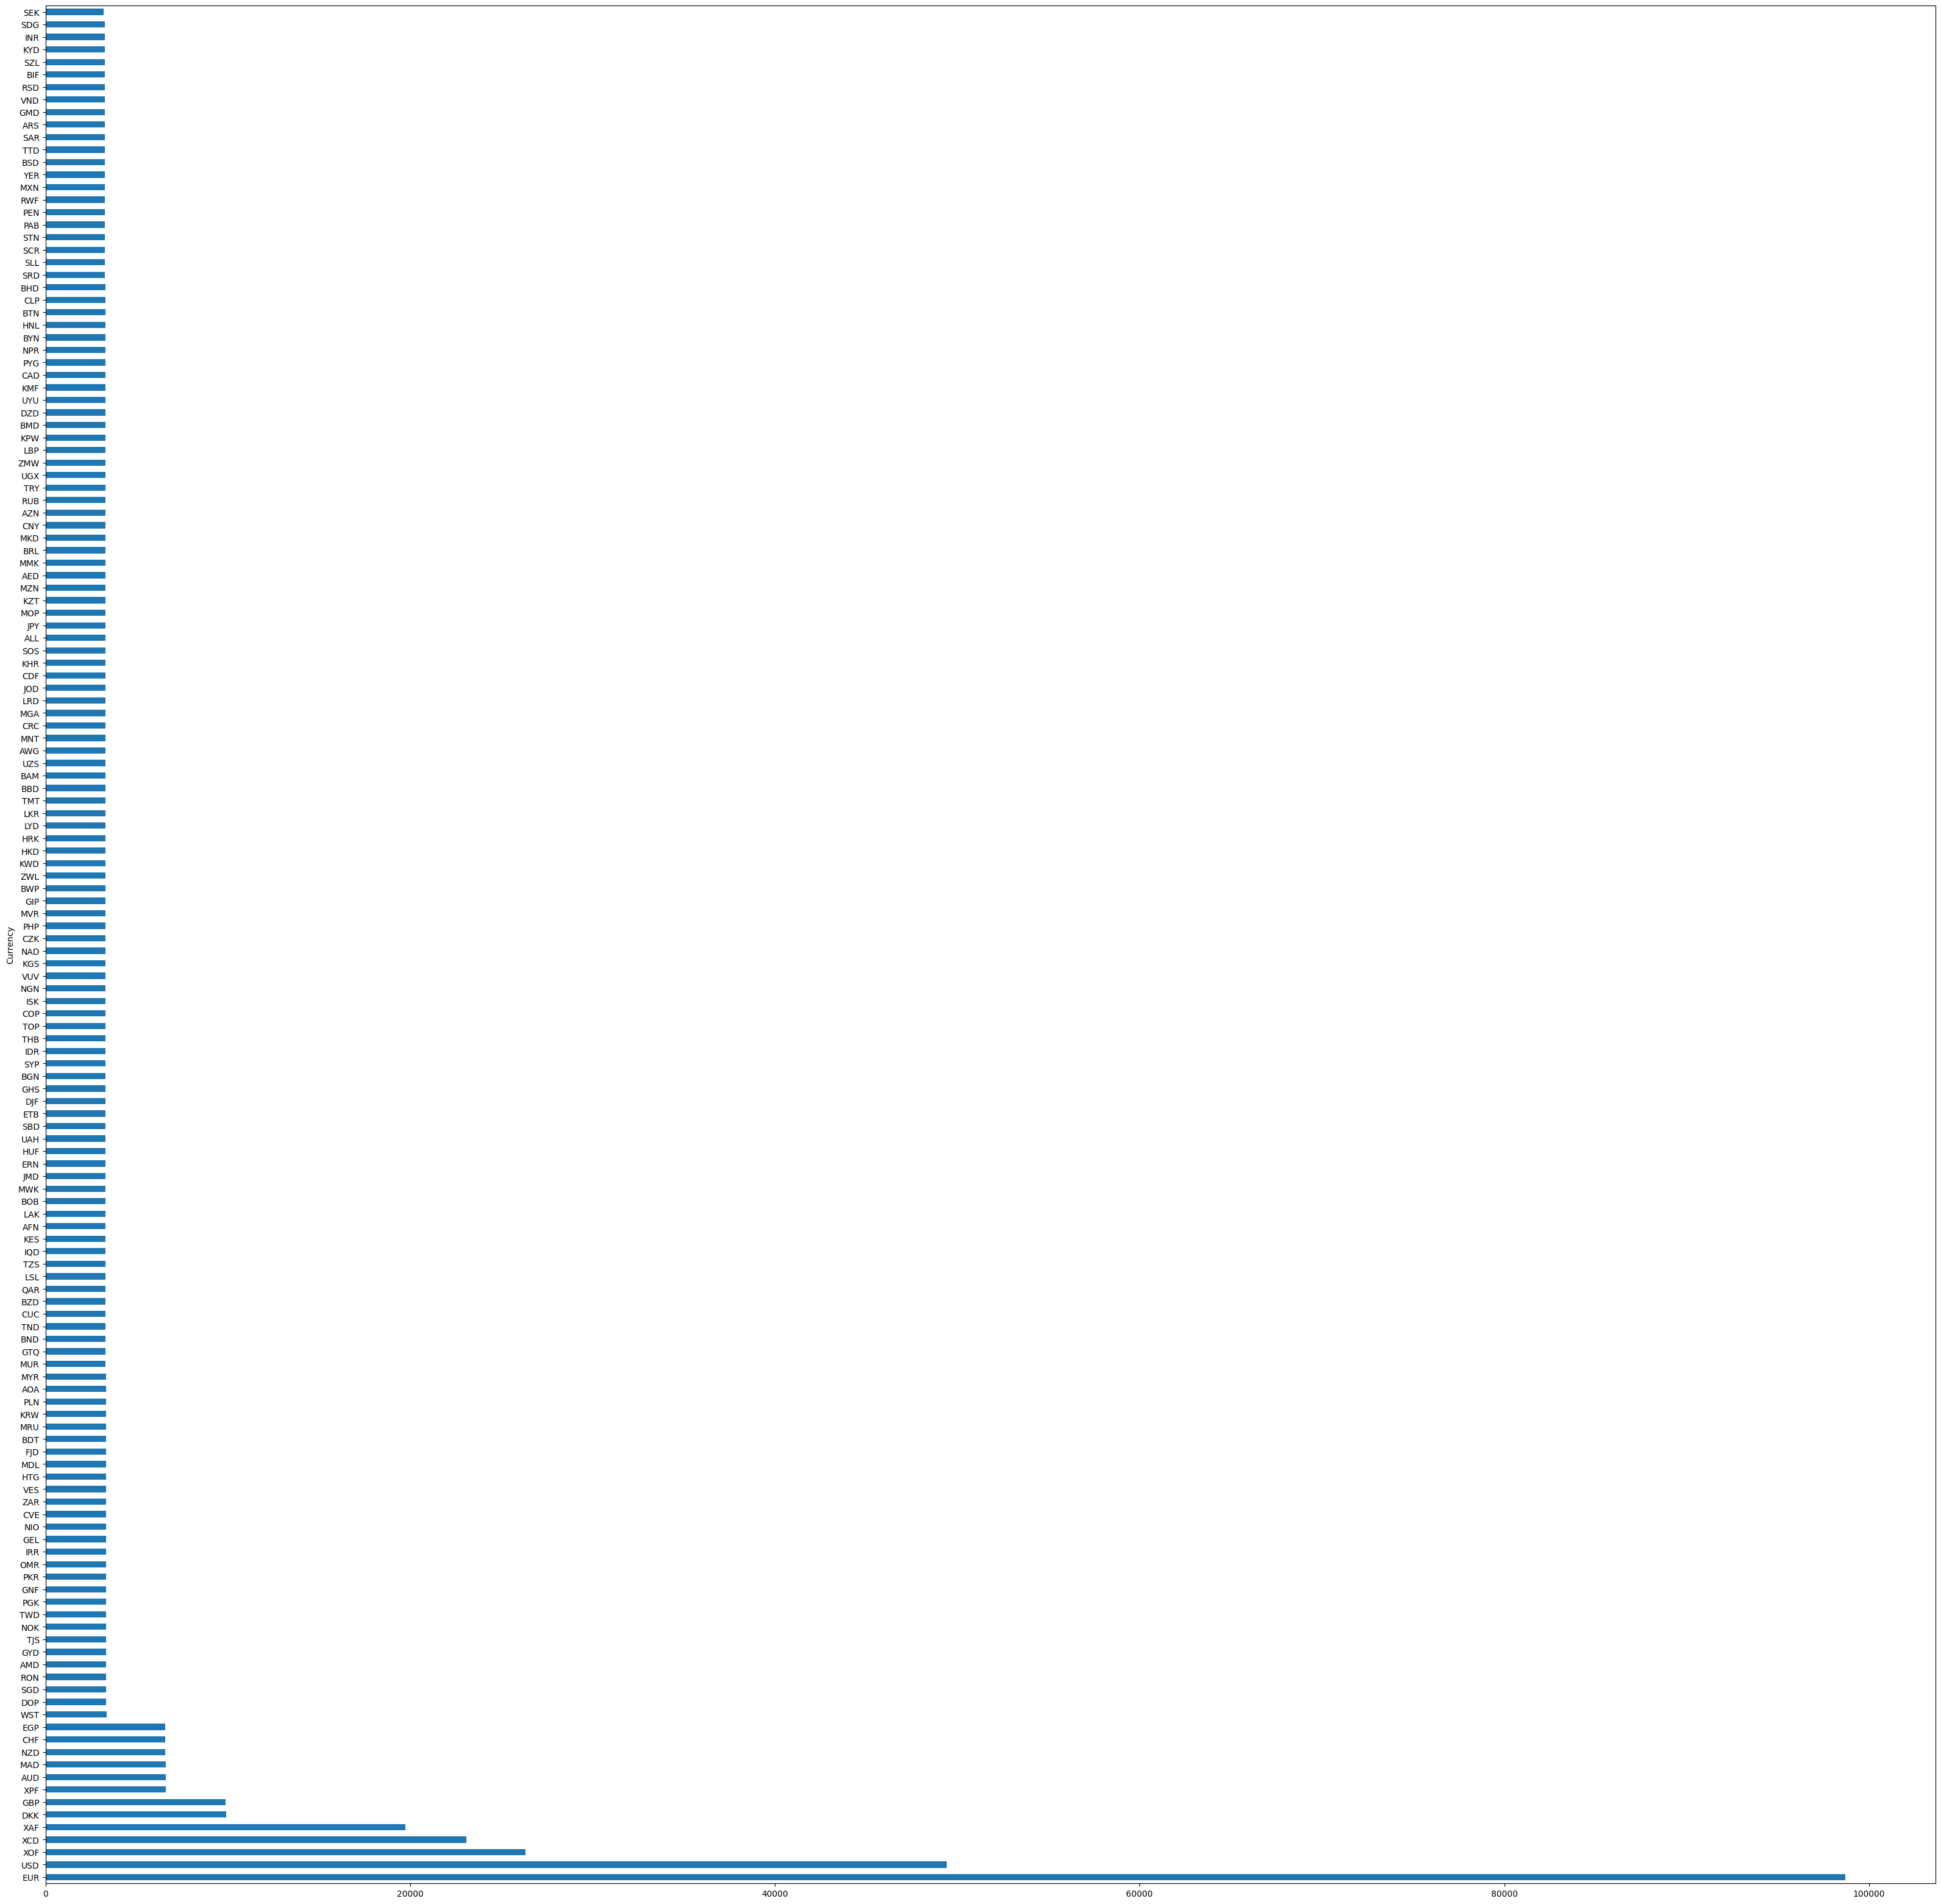

In [173]:
df_clear['Currency'].value_counts().plot.barh(figsize=(40,40));

bu grafikte çalışanların maaşlarını aldıkları para birimlerini görüntülüyoruz göründüğü gibi açık ara en çok maaş alınan kur EUR olmuştur hemen arkasından USD gelmektedir bu iki kur da ciddi anlamda bir fazlalık görünüyor.

## KATEGORİK GRUPLAMA TERCİHLERİ

kendime bir araştırma sorusu oluşturuyorum örneğin
USD bakımından en çok para kazanan meslekler hangileridir gibi şimdi aşağıda çalışmasını yapalım.

In [174]:
df_clear_salary_usd = df.groupby(by = "Job Title")["Salary (USD)"].mean().to_frame().reset_index().sort_values(by = "Salary (USD)", ascending = False)

df_clear_salary_usd

,Job Title,Salary (USD)
3332,Surgeon - Heart Transplant,189535.91
3334,Surgeon - Orthopedic,182849.41
709,Chief of Surgery,179382.62
3331,Surgeon - Cardiothoracic,174953.30
3336,Surgeon - Plastic Reconstructive,167080.20
...,...,...
1750,Handyman,7229.50
1606,Forklift Operator,7204.75
1716,Greenhouse Assistant,7064.70
887,Construction Laborer,6764.97


gördüğümüz üzere en çok para kazandıran meslek Surgeon - Heart Transplant olarak belirlenmiştir yıllık ortalama 189535.906462 USD kazanıyorlar. USD bakımından en düşük maaşa sahip olan meslek ise yıllık ortalama 6575.374714 USD kazanan Production Laborer olmuştur.

şimdi de Türkiye de çalışan kişilerin hangi iş kategorilerinde olduğunu öğrenelim

In [175]:
df_clear_country = df_clear.groupby(by = "Country")["Job Title"].value_counts().to_frame().reset_index().sort_values(by = "count", ascending = False)
df_clear_turkey = df_clear_country[df_clear_country['Country']=="Turkey"]
df_clear_turkey

,Country,Job Title,count
640179,Turkey,Contracts Manager,4
640180,Turkey,Operations Manager,4
640181,Turkey,Technical Manager,4
640192,Turkey,Warehouse Manager,3
640191,Turkey,Sales Engineer,3
...,...,...,...
642914,Turkey,SEO Manager,1
642915,Turkey,SHEQ Officer,1
642916,Turkey,SOA Analyst,1
642917,Turkey,SOC Engineer,1


Veri setimde türkiyeden alınan verilere göre 4 kişi contracts manager , 4 kişi operations manager yine 4 kişi technical manager pozisyonlarında çalışıyor ve bu şekilde farklı iş kollarında toplam 3150 çalışan barındırıyor

## NUMERİC DEĞİŞKEN ANALİZLERİM

In [176]:
df_clear_numerical = df_clear.select_dtypes(include = ["float64","int64"])
df_clear_numerical.head()

,Salary,Exchange Rate,Salary (USD)
0,501400.00,71.24,7037.74
1,890100.00,71.24,12493.61
2,705500.00,71.24,9902.53
3,810500.00,71.24,11376.33
4,552400.00,71.24,7753.59


bu kod satırını kullanarak parametresi float veya int olan değişkenleri seçiyoruz bunları da nümerik değişkenlerimiz olarak kodluyoruz

In [177]:
pd.set_option('display.float_format','{:.2f}'.format)
df_clear_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,727748.00,8471014.48,48822136.17,2420.00,39640.00,142300.00,1606100.00,2603999900.00
Exchange Rate,727748.00,1529.96,7483.04,0.31,1.00,10.80,177.94,90879.94
Salary (USD),727748.00,40828.18,263926.55,28.95,6266.00,14724.18,32551.44,16174763.85


describe satırında nümeric değişkenlerimizin tanımlayıcı istatistiklerini görüntülüyoruz bir üstteki kod satırında ise sayıların bilimsel gösterimleri kapatmak için bir kod yazdım yani çıktılarımda "e" li satırları görmemek için.çıktılarımızı yorumlamak istersek ise USD cinsine çerildiğinde alınan en yüksek maaş 16174763.85 USD olarak gözüküyor en düşük maaş ise 28.95 USD gerçekten de arada bir uçurum var bunun en büyük sebebi ise muhtemelen kur farkı diye düşünüyorum ancak bu fikir de kalmayacak ilerleyen aşamalarda değişkenlerimin birbirleriyle ilişkilerini incelediğimde bunu görmeyi bekliyorum.

/tmp/ipykernel_30/3660061520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Salary (USD)'] = np.log1p(df_clear['Salary (USD)'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


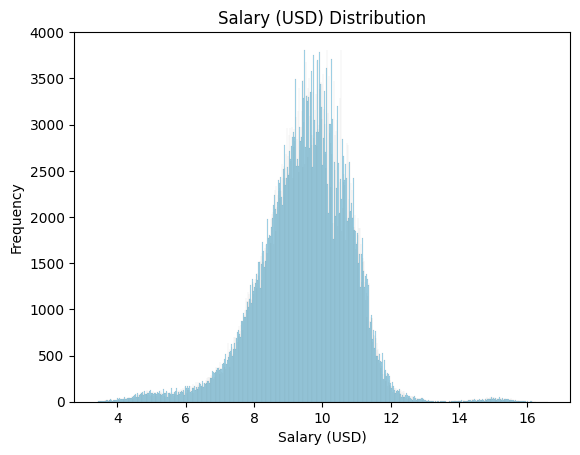

In [178]:
df_clear['Salary (USD)'] = np.log1p(df_clear['Salary (USD)'])

sns.histplot(data=df_clear['Salary (USD)'], kde=False, bins=1000, color='skyblue')
plt.title('Salary (USD) Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

Sallary  (USD) değişkenimde çok fazla veri olduğu için grafiğini çizdirmekte zorlandım ben de alternatif bir yöntem olarak değişkenimişn logaritmik dönüşümünü yapıp sonrasında grafiği çizdirdim ve normal ile sola çarpık dağılım arasında bir şekilde görüntüledim

/tmp/ipykernel_30/3304176919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Exchange Rate (Million)'] = df_clear['Exchange Rate'] / 1e6
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


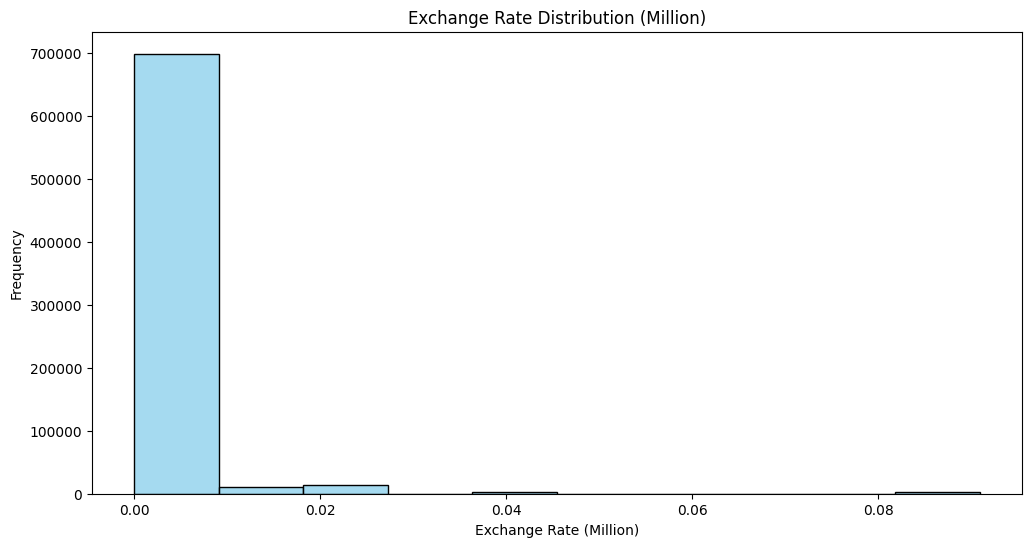

In [179]:
df_clear['Exchange Rate (Million)'] = df_clear['Exchange Rate'] / 1e6

plt.figure(figsize=(12, 6))

sns.histplot(data=df_clear['Exchange Rate (Million)'], kde=False, bins=10, color='skyblue')

plt.title('Exchange Rate Distribution (Million)')
plt.xlabel('Exchange Rate (Million)')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.2f}'))
plt.show()


Exchange Rate değişkenimin dağılımını görüntülüyorum dağılımda bazı dengesizlikler görünüyor bu da ülkelerin birbirinden farklı kurlara sahip olması ve ülkelere göre kur bazında çok büyük farklar veya yığılmalar olması denilebilir. Verim cok büyük sayılarda gösterildiği için milyonluk ölçeğe bölüp bilimsel ifadeleri de kaldırıp o şekilde bir grafik çizdirmeye calistim

In [ ]:
sns.scatterplot(data = df_clear, 
               x= "Salary",
               y= "Exchange Rate",
               hue = "Salary (USD)");

scatterplotı incelediğimizde daha önce cok fazla görmediğim bir şekilde dağılımlar görüyorum bir sonraki heatmap grafiğimi de yaptığımda ilişkiler hakkında daha doğru yorumlar yapabileceğim

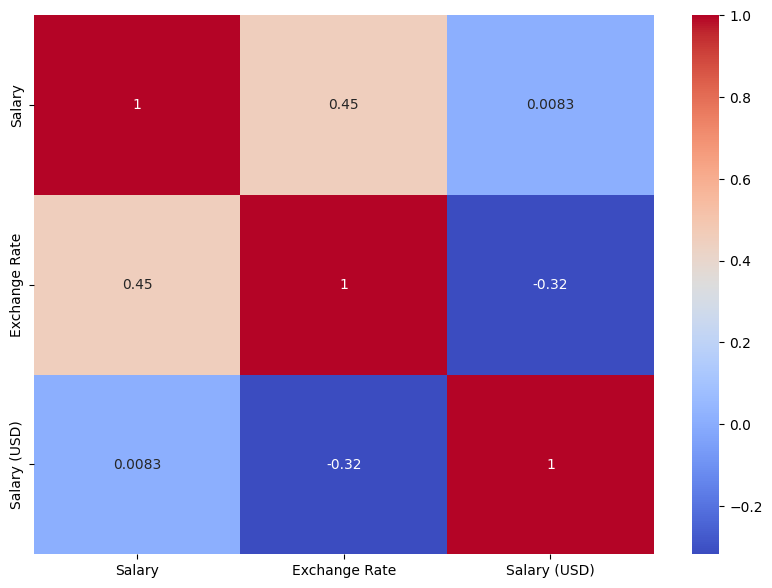

In [181]:
plt.figure(figsize = (10, 7))
sns.heatmap(df_clear[['Salary', 'Exchange Rate', 'Salary (USD)']].corr(), annot = True, cmap = "coolwarm");

heatmap grafiğimde görüğüm gibi Salary ve Exchange Rate değişkenim arasında 0.45 büyüklüğünde pozitif bir iilişki olduğu görülüuor,Salary (USD) ve Salary değişkenim arasında ise 0.0074 büyüklüğünde pozitif bir ilişki görünüyor,Excahnge Rate ve Salary (USD) değişkenlerim arasında ise 0.35 büyüklüğünde negatif bir ilişki var ancak bu ilişkilerin istatistiksel olarak anlamlı olup olmadıklarını gerekli testleri yapmadan söyleyemeyiz.

## AYKRIRI DEĞERLERİM

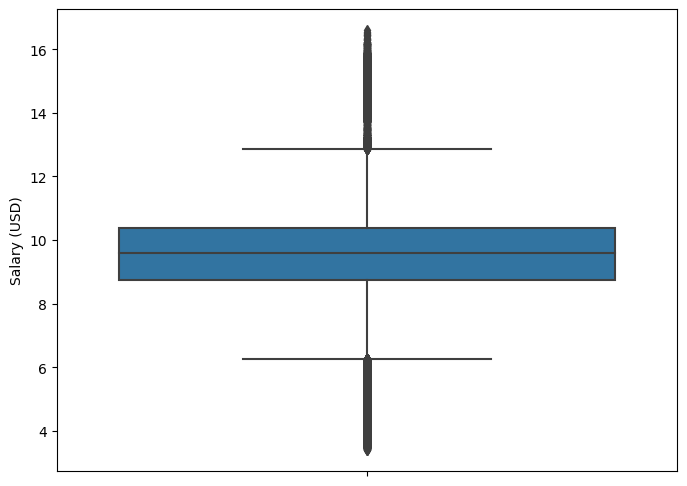

In [182]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_clear,
            y = df_clear["Salary (USD)"],
            orient = "v");

bu kod ile aykırı değerlerimi grafik üzerinde görselleştiriyorum ve Salary (USD) değişkenimde oldukça fazla olduğunu görebiliyorum

In [183]:
Q1 = df_clear['Salary (USD)'].quantile(0.25)
Q3 = df_clear['Salary (USD)'].quantile(0.75)

print(Q1)
print(Q3)

IQR = Q3-Q1
print(IQR)

lower_fence_usd = Q1 - 1.5*IQR
upper_fence_usd = Q3 + 1.5*IQR

8.743053050224676
10.390607606424211
1.6475545561995357


bu kod satırında eğitim webinarında öğrendiğimiz IQR değerinin bulunması ve alt,üst sınırların belirlenmesi için gerekli kodları yazdık daha sonraki aykırı değerlerle hangi işlemleri yapcağımız konusunda bize bu sınırlar yardımcı olacak.

In [184]:
df_clear.loc[df_clear['Salary (USD)'] > upper_fence_usd, "Salary (USD)"] = upper_fence_usd
df_clear.loc[df_clear['Salary (USD)'] < lower_fence_usd, "Salary (USD)"] = lower_fence_usd

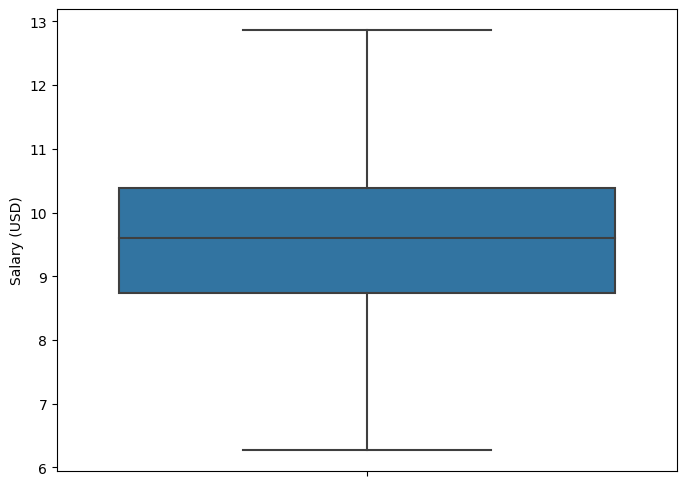

In [185]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_clear,
            y = df_clear["Salary (USD)"],
            orient = "v");

çalıştığım değişken USD kuruna çevrilmiş bir maaş belirteci olduğu için mevcut zamandaki kur farklarından dolayı aykırı değerlerimin olmasını bekliyordum ancak bu değerleri silmenin verime kötü etkisi olacağını düşündüm o yüzden aykırı değerleri baskılayarak alt ve üst sınırlara eşitledim bu da Salary (USD) değişkenimşn son halinin grafiği.

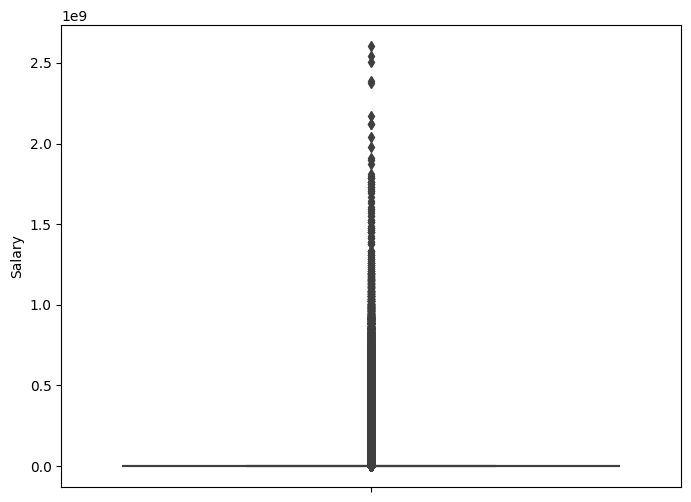

In [186]:
plt.figure(figsize = (8,6))
sns.boxplot(data = df_clear,
            y = df_clear["Salary"],
            orient = "v");

salary değişkenim için boxplot çizdirdigiğimde milyonluk ölçekte gösteriminde çok net bir grafik görüntüleyemiyorum ancak yoğunluklardan anlayabildiğim kadarıyla alt sınırımda büyük bir yoğunluk görüyorum o yüzden ortalamamının değişmemesi adına alt ve üst sınırlara baskılamak yerine aykırı değerlerimi ortalamaya eşitlemeye karar verdim bir sonraki aşamalarımda bunu yapacağım

In [187]:
Q1 = df_clear['Salary'].quantile(0.25)
Q3 = df_clear['Salary'].quantile(0.75)

print(Q1)
print(Q3)

IQR = Q3-Q1
print(IQR)

lower_fence_salary = Q1 - 1.5*IQR
upper_fence_salary = Q3 + 1.5*IQR

39640.0
1606100.0
1566460.0


yine IQR değeri sayesinde alt ve üst sınırlarımı salary değişkenim için belirliyorum

In [188]:
df_clear.loc[df_clear['Salary'] > upper_fence_salary, "Salary"] = df_clear['Salary'].mean()
df_clear.loc[df_clear['Salary'] < lower_fence_salary, "Salary"] = df_clear['Salary'].mean()

alt ve üst sınırın dışında kalan değerlerimi ortalamaya eşitliyorum

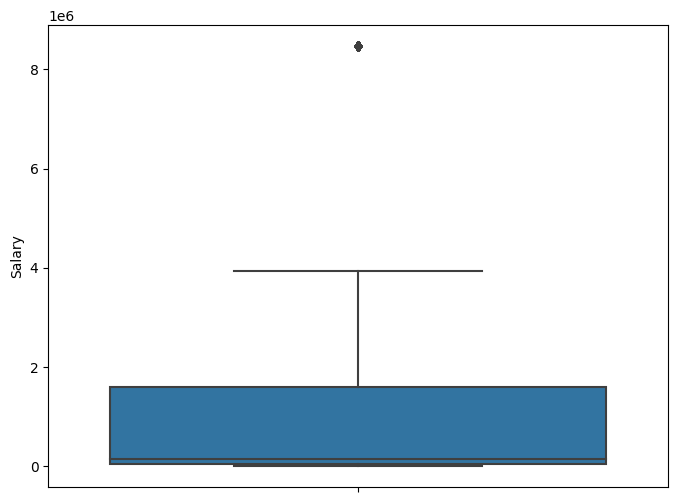

In [189]:
plt.figure(figsize = (8,6))
sns.boxplot(data = df_clear,
            y = df_clear["Salary"],
            orient = "v");

ve salary değişkenimin son halinin boxplot grafği 

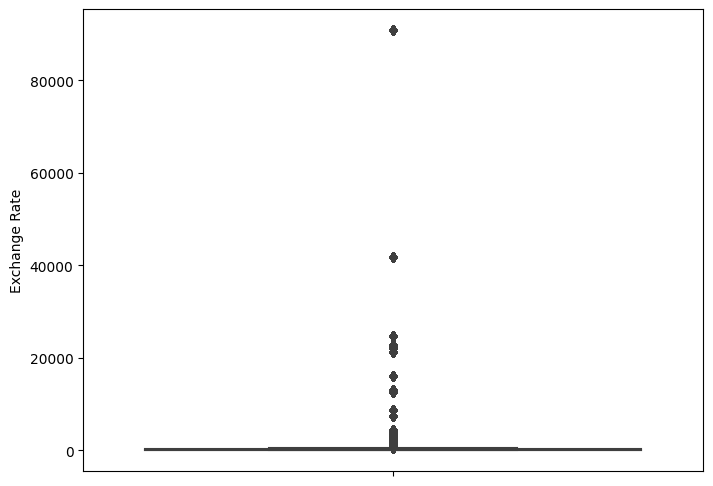

In [190]:
plt.figure(figsize = (8,6))
sns.boxplot(data = df_clear,
            y = df_clear["Exchange Rate"],
            orient = "v");

exhabge rate deüişkenimin boxplot grafiği ancak yine düzgün değil simdi alt ve üst sınırlarımı belirleyip baskılama yöntemiyle aykrı değerlerimi sınırlara eşitleyeceğim cünkü burada daha dengeli bir yoğunluk görüyorum

In [191]:
Q1 = df_clear['Exchange Rate'].quantile(0.25)
Q3 = df_clear['Exchange Rate'].quantile(0.75)

print(Q1)
print(Q3)

IQR = Q3-Q1
print(IQR)

lower_fence_exchange_rate = Q1 - 1.5*IQR
upper_fence_exchange_rate = Q3 + 1.5*IQR

1.0
177.94220345
176.94220345


In [192]:
df_clear.loc[df_clear['Exchange Rate'] > upper_fence_exchange_rate, "Exchange_Rate"] = upper_fence_exchange_rate
df_clear.loc[df_clear['Exchange Rate'] < lower_fence_exchange_rate, "Exchange Rate"] = lower_fence_exchange_rate

/tmp/ipykernel_30/3708707025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear.loc[df_clear['Exchange Rate'] > upper_fence_exchange_rate, "Exchange_Rate"] = upper_fence_exchange_rate


/tmp/ipykernel_30/2785447399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear["Exchange Rate (Log)"] = np.log1p(df_clear["Exchange Rate"])


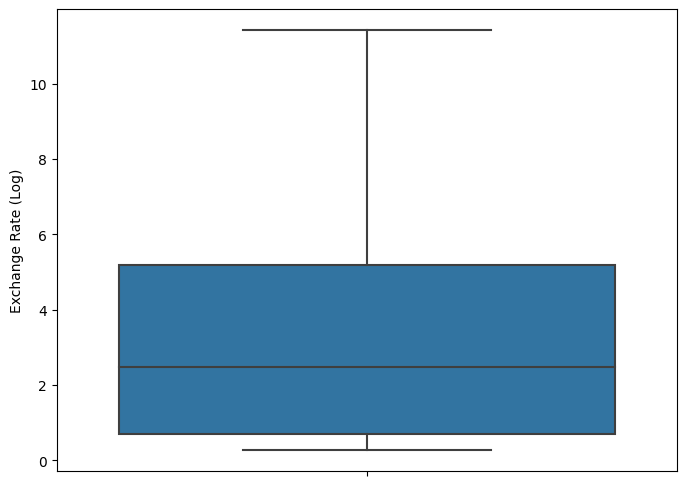

In [193]:
df_clear["Exchange Rate (Log)"] = np.log1p(df_clear["Exchange Rate"])

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clear,
            y=df_clear["Exchange Rate (Log)"],
            orient="v")
plt.show()


değerler arasında cok büyük farklılıklar olduğu için düzgün bir grafik elde edemiyordum o yüzden değişkenime logaritmik bir dönüşüm uygulayıp o şekilde görüntülüyorum ve aykırı değerlerimin gittiini görebiliyorum

## FEATURE ENGİNEERİNG

In [203]:
df_clear.head()

,Country,Job Title,Category,Salary,Currency,Exchange Rate,Salary (USD)
0,Afghanistan,Account Examiner,Accounting and Finance,501400.00,AFN,71.24,8.86
1,Afghanistan,Account Executive,Accounting and Finance,890100.00,AFN,71.24,9.43
2,Afghanistan,Accountant,Accounting and Finance,705500.00,AFN,71.24,9.20
3,Afghanistan,Accounting Analyst,Accounting and Finance,810500.00,AFN,71.24,9.34
4,Afghanistan,Accounting Assistant,Accounting and Finance,552400.00,AFN,71.24,8.96


ancak farkettiğim bir şey var ki yine grafikleme işlemleri sırasında sallarry usd değişkenime iki kere logaritmik işlem uygumısım ve kopya bir veri seti üzerinde çalışmadığımdan direkt orjinal veri setime logartimik düzenleme yapılmış şekilde kaydolmui bunu tekrar düzeltmek için 2 kere ters logaritmik dönüşüm yapıp eski haline getirmeye çalışacağım.

In [ ]:
# Logaritmik dönüşümü geri alma
df_clear['Salary (USD)'] = np.expm1(df_clear['Salary (USD)'])
df_clear.head()

In [204]:
# Logaritmik dönüşümü geri alma
df_clear['Salary (USD)'] = np.expm1(df_clear['Salary (USD)'])
df_clear.head()

/tmp/ipykernel_30/1240167143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Salary (USD)'] = np.expm1(df_clear['Salary (USD)'])


,Country,Job Title,Category,Salary,Currency,Exchange Rate,Salary (USD)
0,Afghanistan,Account Examiner,Accounting and Finance,501400.00,AFN,71.24,7037.74
1,Afghanistan,Account Executive,Accounting and Finance,890100.00,AFN,71.24,12493.61
2,Afghanistan,Accountant,Accounting and Finance,705500.00,AFN,71.24,9902.53
3,Afghanistan,Accounting Analyst,Accounting and Finance,810500.00,AFN,71.24,11376.33
4,Afghanistan,Accounting Assistant,Accounting and Finance,552400.00,AFN,71.24,7753.59


2 kere ters ogaritmik işlem sonucunda sallary usd değişkenim orjinal haline döndü

şimdi ise kendi yorumumla beraber veri setime kullanışlı sütunlar eklmeye çalışacağım.

In [205]:
def exchange_rates(Exchange_Rate):
    if Exchange_Rate < 5:
        return 'LOW'
    elif 5<= Exchange_Rate <= 50:
        return 'MEDİUM'
    else:
        return 'HİGH'
df_clear['exchange_rates'] = df_clear['Exchange Rate'].apply(exchange_rates)
df_clear.head()

/tmp/ipykernel_30/3964029217.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['exchange_rates'] = df_clear['Exchange Rate'].apply(exchange_rates)


,Country,Job Title,Category,Salary,Currency,Exchange Rate,Salary (USD),exchange_rates
0,Afghanistan,Account Examiner,Accounting and Finance,501400.00,AFN,71.24,7037.74,HİGH
1,Afghanistan,Account Executive,Accounting and Finance,890100.00,AFN,71.24,12493.61,HİGH
2,Afghanistan,Accountant,Accounting and Finance,705500.00,AFN,71.24,9902.53,HİGH
3,Afghanistan,Accounting Analyst,Accounting and Finance,810500.00,AFN,71.24,11376.33,HİGH
4,Afghanistan,Accounting Assistant,Accounting and Finance,552400.00,AFN,71.24,7753.59,HİGH


veri setime yeni bir sütun ekledim bu sütünde exchange rate değerleri 5 den küçük olanlar low değerini , 5 ile 50 arasında olanlar medium değerini, bunların dışında kalanlar ise high değerini alacaklar 